In [1]:
import os

In [2]:
os.listdir('./images/')

['train', 'validation']

In [3]:

# Python program to create 
# Image Classifier using CNN 
  
# Importing the required libraries 
import cv2 
import os 
import numpy as np 
from random import shuffle 
from tqdm import tqdm 
  

train_path= './images/train/'
test_path= './images/validation/'
 


In [4]:
emotions= os.listdir('./images/train/')
emotions

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [5]:


for emotion in emotions :
    
    c= len(os.listdir(f'{train_path}{emotion}'))
    print(f"{emotion} ==> {c}")

angry ==> 3993
disgust ==> 436
fear ==> 4103
happy ==> 7164
neutral ==> 4982
sad ==> 4938
surprise ==> 3205


In [6]:
for emotion in emotions :
    
    c= len(os.listdir(f'{test_path}{emotion}'))
    print(f"{emotion} ==> {c}")

angry ==> 960
disgust ==> 111
fear ==> 1018
happy ==> 1825
neutral ==> 1216
sad ==> 1139
surprise ==> 797


In [7]:
training_data_x=[]
training_data_y=[]
for emotion_folder in  os.listdir(train_path):
    
    for file in tqdm(os.listdir(f"{train_path}{emotion_folder}")):
        # print(file, emotion_folder)
        
        img=cv2.imread(f'{train_path}{emotion_folder}/{file}')
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        training_data_x.append(img)
        training_data_y.append(emotion_folder)
    

100%|████████████████████████████████████████████████████████████████████████████| 3205/3205 [00:01<00:00, 2268.05it/s]


In [8]:
testing_data_x=[]
testing_data_y=[]
for emotion_folder in  os.listdir(test_path):
    
    for file in tqdm(os.listdir(f"{test_path}{emotion_folder}")):
        # print(file, emotion_folder)
        img=cv2.imread(f'{test_path}{emotion_folder}/{file}')
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        
        testing_data_x.append(img)
        testing_data_y.append(emotion_folder)

100%|██████████████████████████████████████████████████████████████████████████████| 797/797 [00:00<00:00, 2169.54it/s]


In [9]:
images_to_show=[]
for emotion_folder in  os.listdir(train_path):
    c=0
    for file in tqdm(os.listdir(f"{train_path}{emotion_folder}")):
        c=c+1
        # print(file, emotion_folder)
        img=cv2.imread(f'{train_path}{emotion_folder}/{file}')
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images_to_show.append(img)
        if(c==5):
            break

  0%|                                                                               | 4/3205 [00:00<00:03, 1032.44it/s]


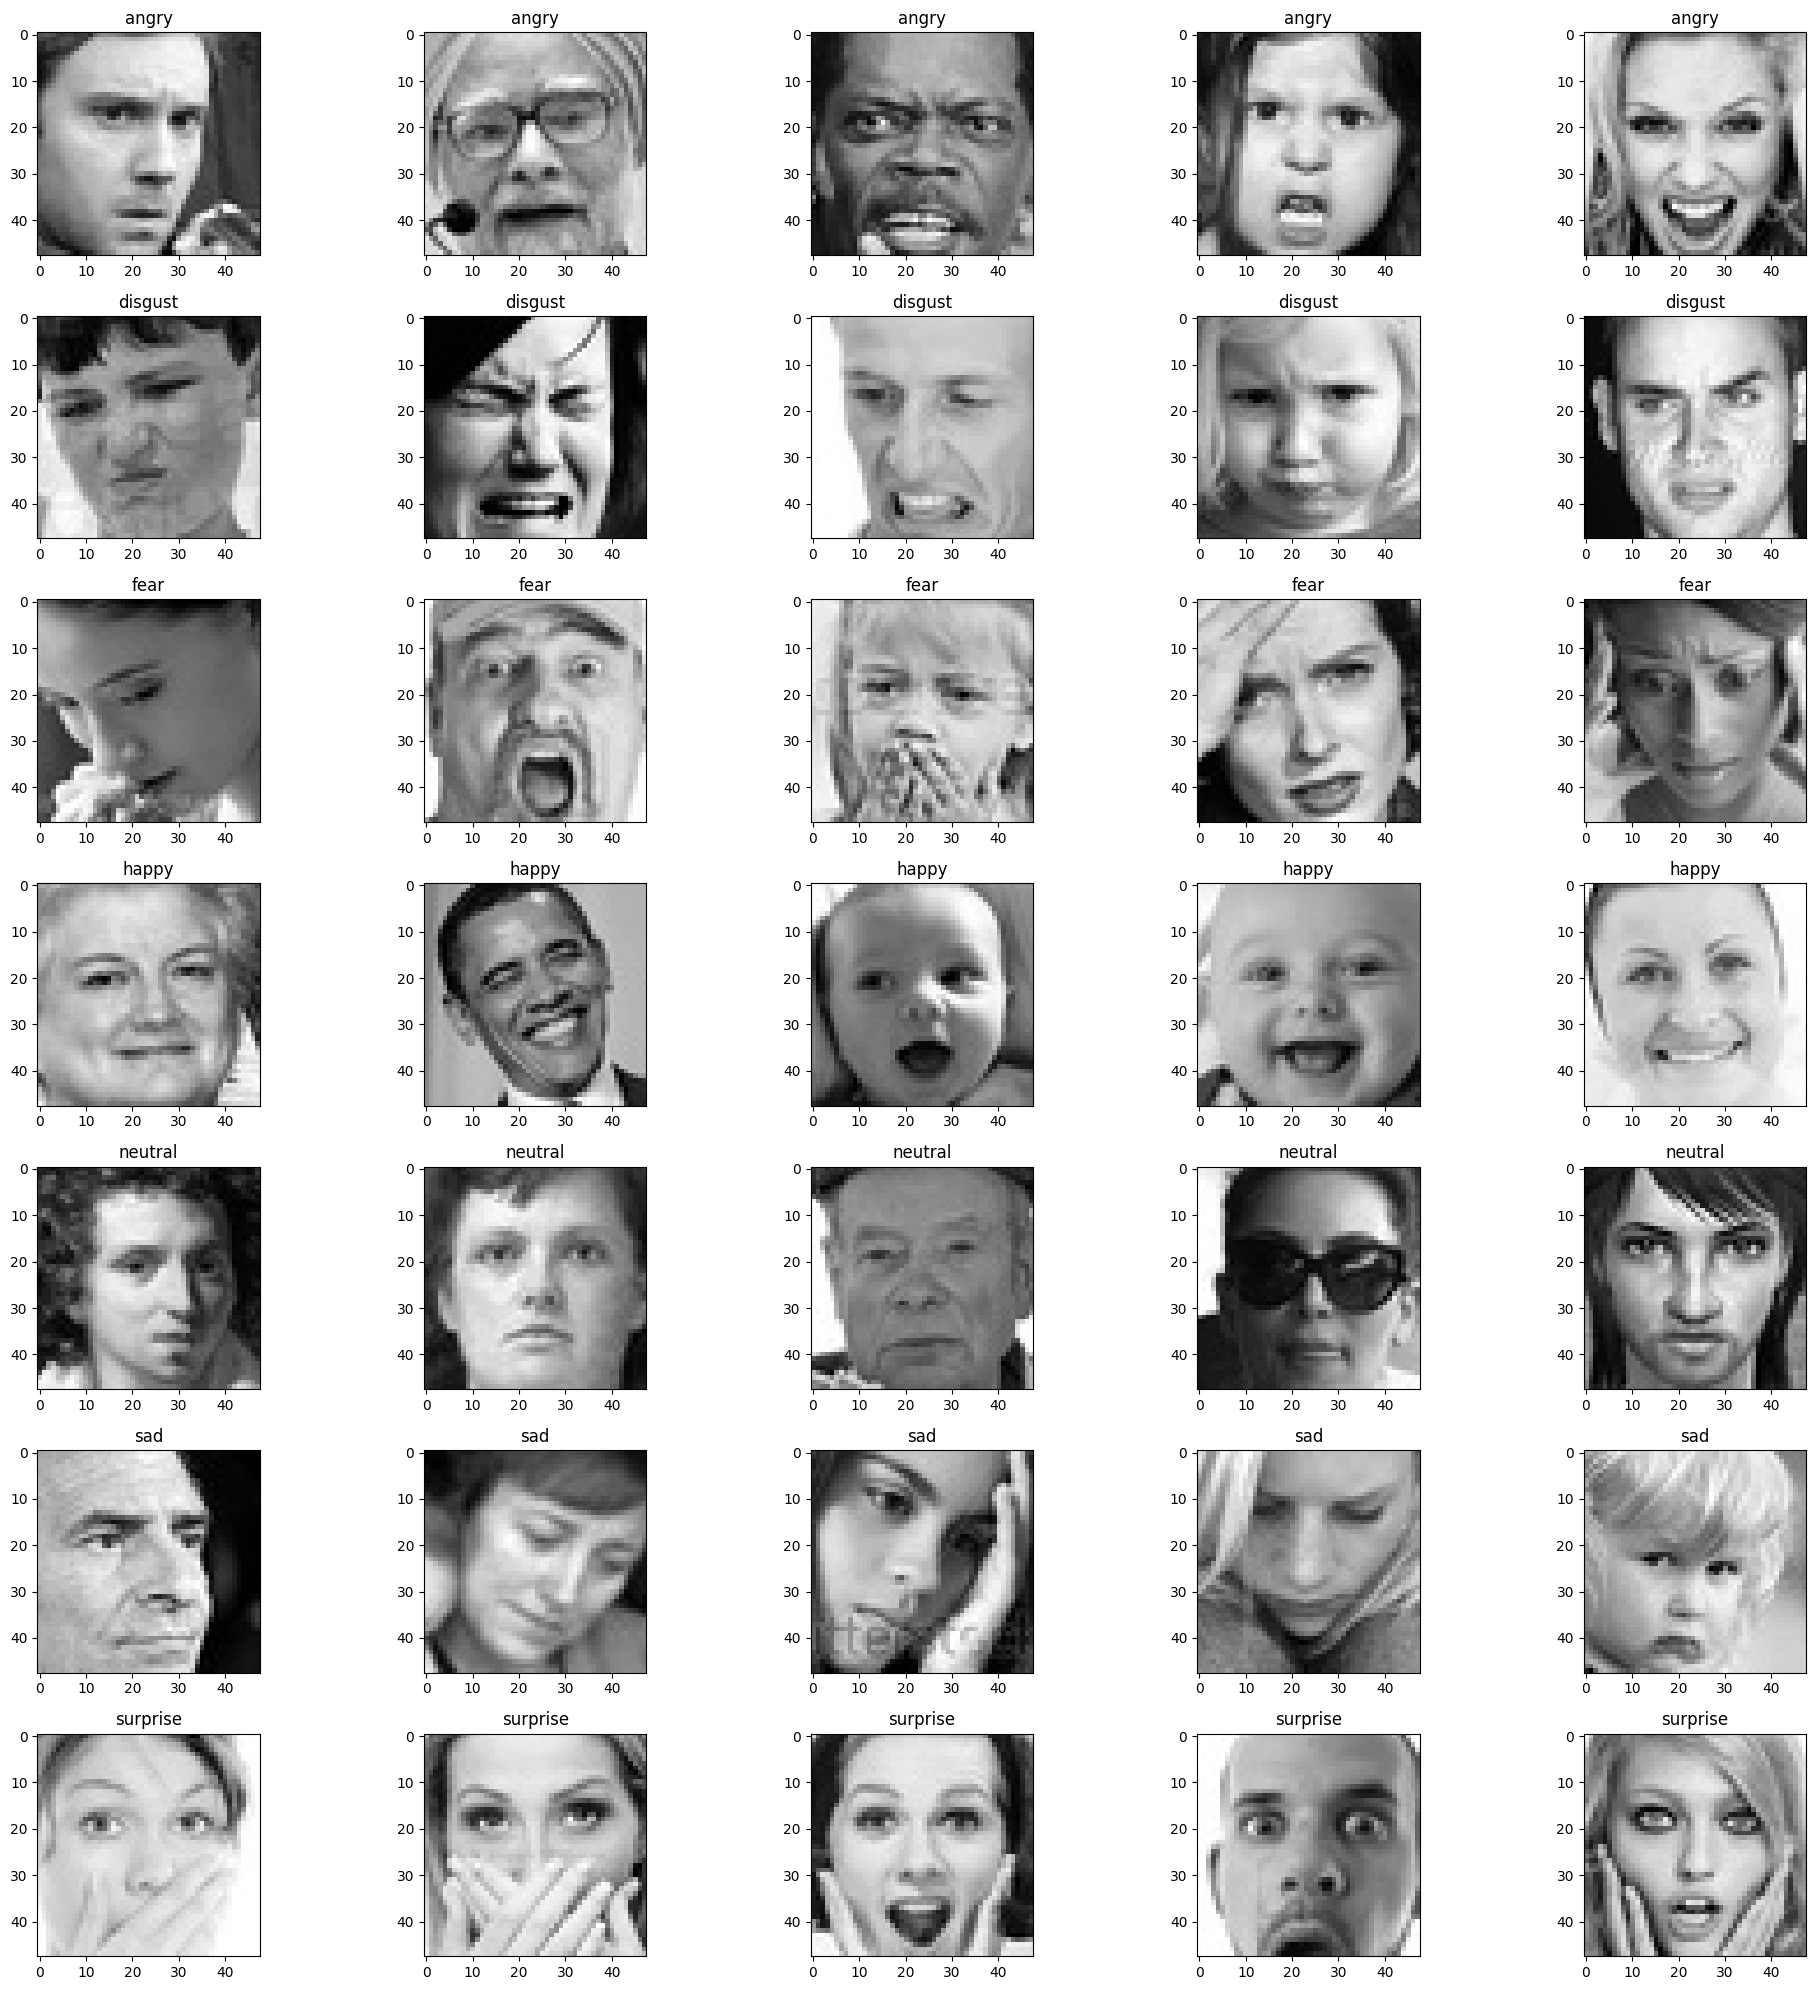

In [10]:
from matplotlib import pyplot as plt
m=len(emotions)
n=5 #sample for each emotion
fig, axes = plt.subplots(nrows=m, ncols=n, figsize=(20, 20))
k=0
for i in range(m):
    for j in range( n):
        axes[i,j].imshow(images_to_show[k],cmap='gray')
        axes[i,j].set_title(emotions[i])
        
        k=k+1
   
plt.tight_layout()

In [11]:
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow

In [12]:
x_train=np.array(training_data_x)

x_test=np.array(testing_data_x)



In [13]:
x_train.shape

(28821, 48, 48)

In [14]:
x_test.shape

(7066, 48, 48)

In [15]:
x_train= x_train.reshape(-1,48,48,1)
x_test=x_test.reshape(-1,48,48,1)

x_train=x_train.astype("float32")/255.0

x_test=x_test.astype("float32")/255.0

In [16]:
x_train.shape

(28821, 48, 48, 1)

In [17]:
x_test.shape

(7066, 48, 48, 1)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

y_train=le.fit_transform(training_data_y)
y_test=le.transform(testing_data_y)

In [20]:
len(y_test)

7066

In [45]:

model = tensorflow.keras.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 
1)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, (3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(128, (3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, (3,3), activation='relu'),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(7, activation='softmax')
])


model.summary()

C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 2, 2, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,367 (716.28 KB)

 Trainable params: 183,367 (716.28 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [47]:
history=model.fit(x_train,y_train ,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.2808 - loss: 1.7543 - val_accuracy: 0.4236 - val_loss: 1.4973
Epoch 2/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.4452 - loss: 1.4359 - val_accuracy: 0.4891 - val_loss: 1.3462
Epoch 3/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5003 - loss: 1.3048 - val_accuracy: 0.5028 - val_loss: 1.3014
Epoch 4/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5299 - loss: 1.2311 - val_accuracy: 0.5359 - val_loss: 1.2245
Epoch 5/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.5559 - loss: 1.1606 - val_accuracy: 0.5218 - val_loss: 1.2448
Epoch 6/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.5813 - loss: 1.1010 - val_accuracy: 0.5449 - val_loss: 1.2186
Epoch 7/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.5983 - loss: 1.0542 - val_accuracy: 0.5437 - val_loss: 1.2248
Epoch 8/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.6189 - loss: 1.0064 - 

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred =model.predict(x_test)
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = y_test
acc = accuracy_score(Y_true,Y_pred_classes)
class_report = classification_report(Y_true,Y_pred_classes)

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [69]:
acc

0.5584489102745542

In [70]:
print(class_report)

              precision    recall  f1-score   support

           0       0.51      0.38      0.43       960
           1       0.54      0.29      0.38       111
           2       0.47      0.28      0.35      1018
           3       0.72      0.81      0.76      1825
           4       0.55      0.43      0.48      1216
           5       0.38      0.62      0.47      1139
           6       0.68      0.72      0.70       797

    accuracy                           0.56      7066
   macro avg       0.55      0.50      0.51      7066
weighted avg       0.56      0.56      0.55      7066



In [71]:
print(confusion_matrix(y_test,Y_pred_classes))

[[ 362   13   68  109   99  268   41]
 [  23   32   15    7    6   23    5]
 [  95    7  280   98   98  317  123]
 [  46    1   30 1482   59  158   49]
 [  72    2   60  200  518  341   23]
 [  97    3   74  108  129  701   27]
 [  20    1   75   68   30   32  571]]


In [73]:
cat_to_num = dict(zip(le.classes_, le.transform(le.classes_)))
print(cat_to_num)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [74]:
num_to_cat = dict(zip(le.transform(le.classes_),le.classes_))
print(num_to_cat)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [75]:
from tensorflow.keras.models import load_model,save_model

In [76]:
model.save('emotion-classifier.h5')

In [77]:
model2=load_model('./emotion-classifier.h5')

In [78]:
loss,acc=model2.evaluate(x_test,y_test)

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4637 - loss: 1.4610


In [79]:
print(acc)

0.5584489107131958


In [160]:
import numpy as np
import cv2

from matplotlib import pyplot as plt
def getPrediction(img_path):
    mappit=  {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
    img=cv2.imread(img_path)
   
    img = cv2.resize(img, (48, 48))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(img)
    plt.imshow(img,cmap='gray')
    img=img.reshape(-1,48,48,1)
    img=img/255
    y_predicted =model2.predict(img)
    y_predicted_class = np.argmax(y_predicted,axis = 1) 
    print(y_predicted_class)
    print(mappit[y_predicted_class[0]])
    
    
    
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[3]
happy


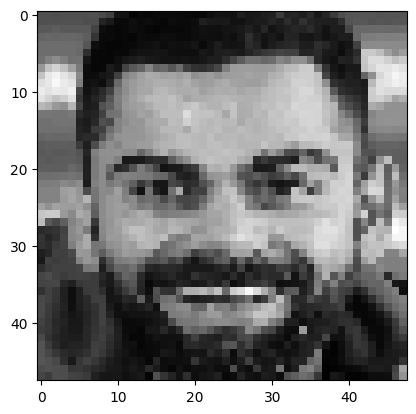

In [167]:
getPrediction('./manual_test/test1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0]
angry


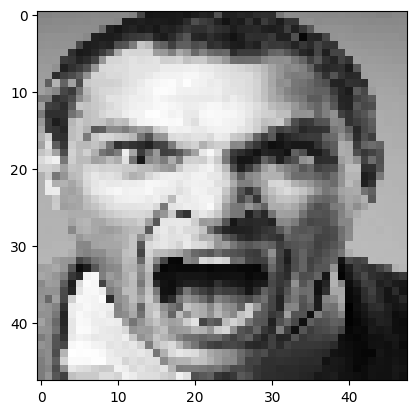

In [168]:
getPrediction('./manual_test/test2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[5]
sad


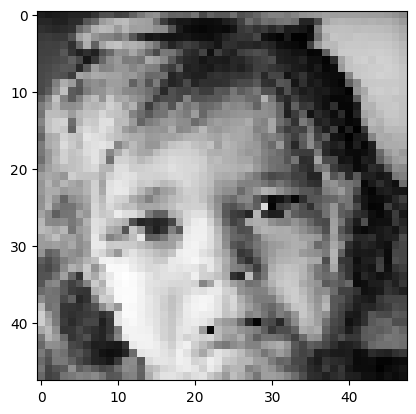

In [169]:
getPrediction('./manual_test/test3.jpg')